In [1]:
import pandas as pd
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%m/%d/%Y")
print(dt_string)

03/25/2021


In [2]:
# read the top users from UCSD team
users = pd.read_json('https://stats.foldingathome.org/api/team/3103')['donors']
data = pd.DataFrame(users.to_list())
rank = data[data['name'] == 'dylannelson'].index[0]
print('current rank: ' + str(rank))

current rank: 11


In [3]:
data.head(rank+1)

,wus,name,rank,credit,team,id
0,2488,Chord,10070.0,177149515,3103,354826760
1,34036,Jtu89,13138.0,139909891,3103,104459
2,432,TanerH,51536.0,24336545,3103,1667330
3,2387,Tillamook.Bill,58371.0,20338899,3103,107119796
4,365,Braeburn,64902.0,17092106,3103,69592644
5,797,keyboard_slap,74465.0,7835369,3103,25522283
6,794,AyyLmao,106640.0,7109456,3103,247179
7,208,TheUnsmilingCat,87081.0,6638728,3103,265731
8,77,apcopeland,130477.0,4914087,3103,417451162
9,425,MilesLab,136857.0,4450332,3103,361746209


In [4]:
current_data = data[['wus', 'rank', 'credit', 'team']].loc[rank]
current_data['date'] = dt_string
current_data['rank'] = current_data.name
current_data

wus             34.0
rank              11
credit     2786669.0
team          3103.0
date      03/25/2021
Name: 11, dtype: object

In [6]:
## Updating 'records.csv'
records = pd.read_csv('records.csv')
#if the current date already has a record...
same_dates = records['date'] == current_data['date']
if (same_dates).sum():
    #replace it with the newer record
    records.drop(same_dates.index, axis = 0)
    records.append(current_data)
else:
    records = records.append(current_data)
records

,wus,rank,credit,team,date
0,12.0,21,454930.0,3103.0,10/13/2020
1,17.0,13,1009351.0,3103.0,10/14/2020
2,22.0,9,1471051.0,3103.0,10/15/2020
11,34.0,11,2786669.0,3103.0,03/25/2021


In [7]:
# Update the Table
records.to_csv('records.csv', index = False)

## EDA

<AxesSubplot:>

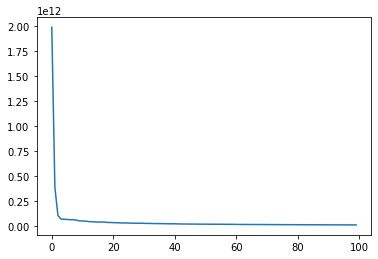

In [8]:
# Distribution of top dontators
users = pd.read_json('https://stats.foldingathome.org/api/donors')['results']
data = pd.DataFrame(users.to_list())
data['credit'].plot()

In [16]:
data[['name','rank','credit']].head()

,name,rank,credit
0,Anonymous,1,1985970140990
1,NVIDIA_Saturn_V,2,385772043308
2,Ytl,3,103182206774
3,GuillaumeSmaha,4,66982552980
4,Hou5e_ALL_15k84jUoNPb1kodGvYtKDHiBPRX4Qs3kx8,5,66044302483


<AxesSubplot:>

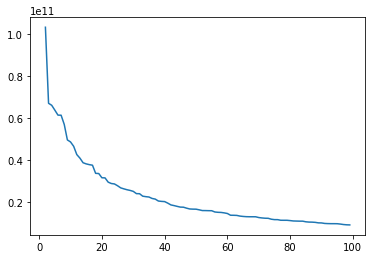

In [13]:
# Distribution of top 100 users poins without "Anonymous"
data.loc[2:99]['credit'].plot()

In [29]:
import time
for idx in range(100):
    time.sleep(.5)
    print("\r{0}".format(idx), end='')

99